<a href="https://colab.research.google.com/github/strawndri/time-series/blob/main/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Extras

## Time Series é uma coleção de dados que segue uma ordem cronológica, um **tempo sequencial**. O período que é representado pode ser em segundos, minutos, horas, dias, meses, anos, etc.

> **Conteúdo da Alura**:
- Crescimento proporcional entre linhas (time series) utilizando pandas: 
https://www.alura.com.br/artigos/crescimento-proporcional-entre-linhas-time-series-utilizando-pandas

In [1]:
def plotar(title, xlabel, ylabel, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(title, fontsize=18, loc='left')
  ax.set_xlabel(xlabel, fontsize=14)
  ax.set_ylabel(ylabel, fontsize=14)
  ax = ax

In [2]:
def compararPlots(title, x, y1, y2, y3, dataset):
  plt.figure(figsize=(16, 12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(title, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

# Importando Bibliotecas

In [3]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

!pip install seaborn
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# Alucar - Análise de Vendas

## Importando a Base de Dados

In [4]:
url = ('https://raw.githubusercontent.com/strawndri/time-series/main/Data/alucar.csv')
alucar = pd.read_csv(url)
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


## Analisando o tamanho da base de dados

In [5]:
print(f'A quantidade de linhas e colunas é: {alucar.shape}')

A quantidade de linhas e colunas é: (24, 2)


## Analisando se há valores nulos

In [6]:
# use .sum() duas vezes para somar as duas colunas  
valores_nulos = alucar.isna().sum().sum()
print(f'Quantidade de valores nulos: {valores_nulos}')

Quantidade de valores nulos: 0


## Tipos dos dados

In [7]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [8]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
# transformando os valores do "mês" em datas
alucar['mes'] = pd.to_datetime(alucar['mes'])

## Gráfico das Vendas

Há algumas padronizações a serem utilizadas quando estamos trabalhando com gráficos (Data Visualization).

Para mais informações, acesse: *https://urbaninstitute.github.io/graphics-styleguide/*

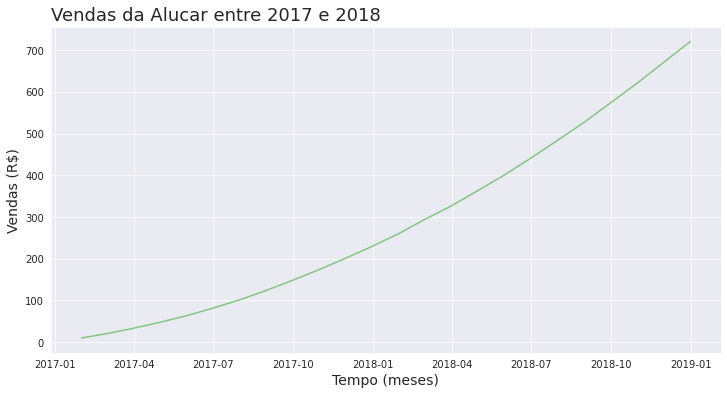

In [10]:
plotar('Vendas da Alucar entre 2017 e 2018', 'Tempo (meses)', 
       'Vendas (R$)', 'mes', 'vendas', alucar)

## Aumento das Vendas

In [11]:
alucar['aumento'] = alucar[['vendas']].diff()

In [12]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


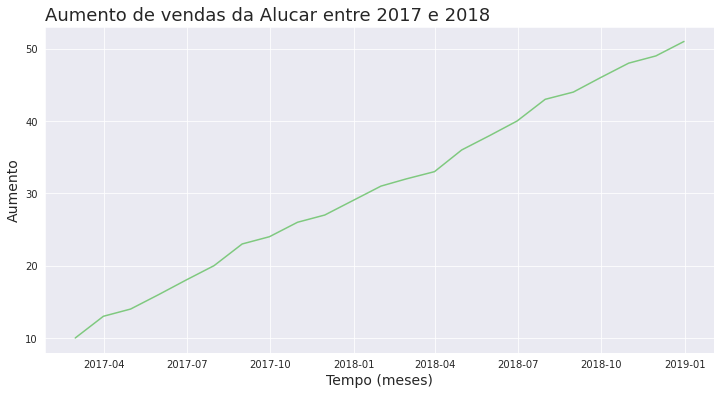

In [13]:
plotar('Aumento de vendas da Alucar entre 2017 e 2018', 'Tempo (meses)', 
       'Aumento', 'mes', 'aumento', alucar)

## Aceleração do Aumento das Vendas

In [14]:
alucar['aceleracao'] = alucar[['aumento']].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


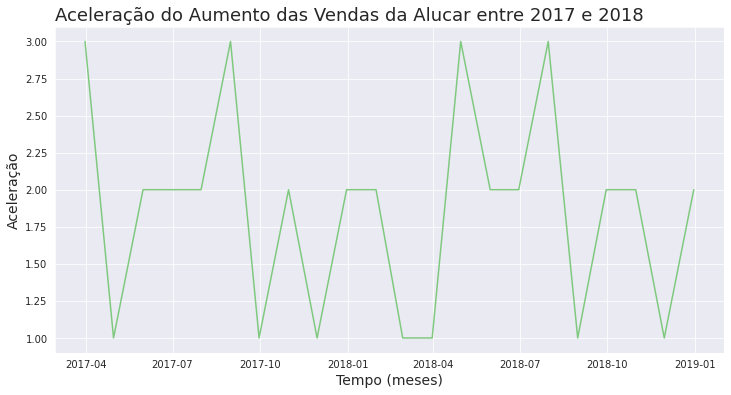

In [15]:
plotar('Aceleração do Aumento das Vendas da Alucar entre 2017 e 2018', 'Tempo (meses)', 
       'Aceleração', 'mes', 'aceleracao', alucar)

## Comparação de Resultados

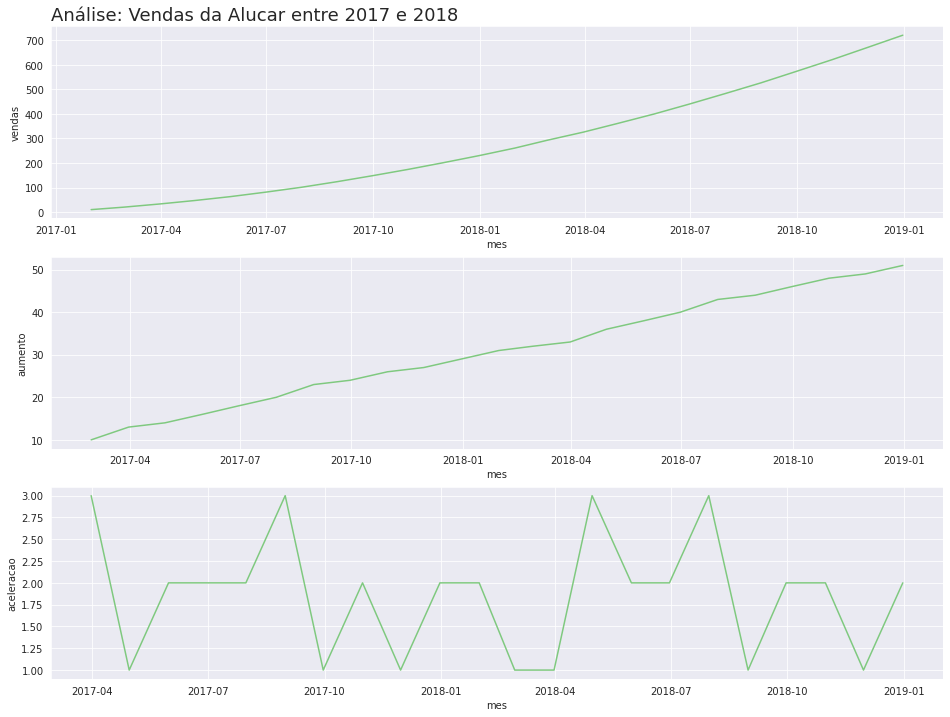

In [16]:
compararPlots('Análise: Vendas da Alucar entre 2017 e 2018', 'mes', 'vendas', 'aumento', 'aceleracao', alucar)

## Autocorrelação

**AutoCorrelação** refere-se a uma correlação de determinados valores, os quais estão ordenados conforme um tempo 

**Para saber mais, acesse:** https://pt.wikipedia.org/wiki/Autocorrela%C3%A7%C3%A3o

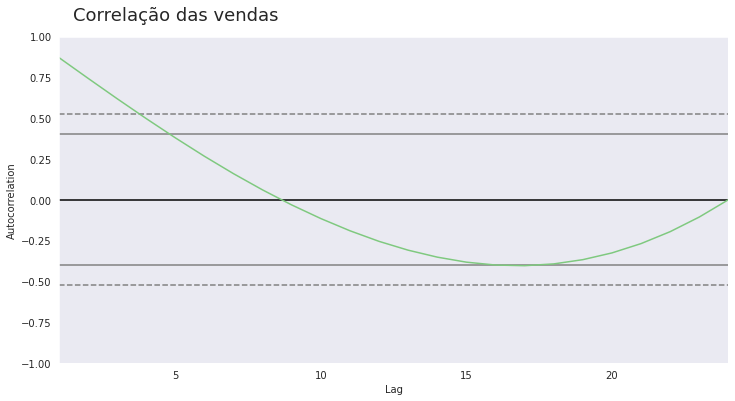

In [17]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

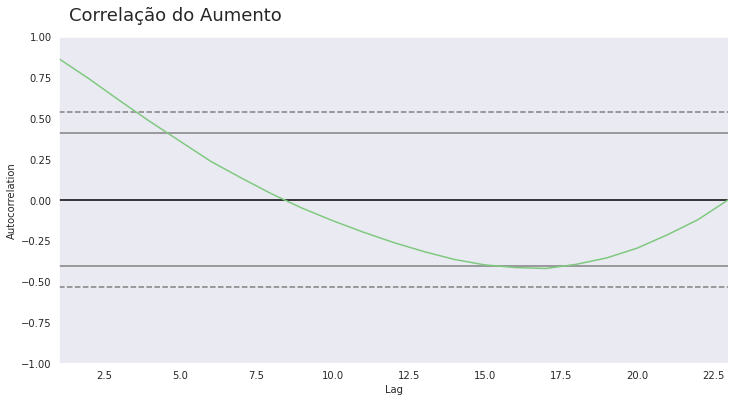

In [18]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

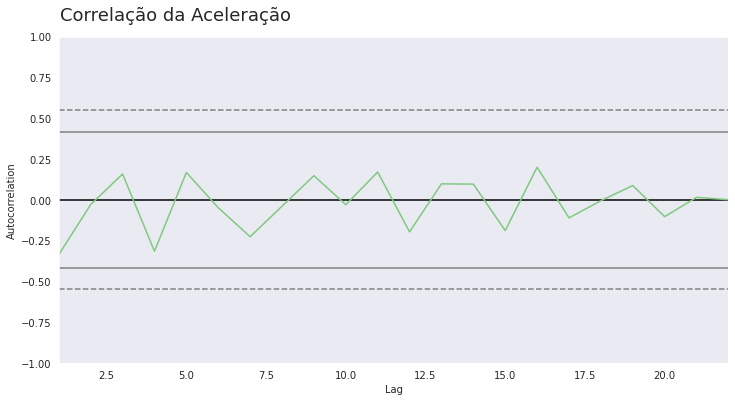

In [19]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando a Newsletter Mensal

In [20]:
url = 'https://raw.githubusercontent.com/strawndri/time-series/main/Data/newsletter_alucar.csv'
assinantes = pd.read_csv(url)
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


## Tratando os dados

In [21]:
print(f'A quantidade de colunas e linhas é: {assinantes.shape}')
print(f'A quantidade de dados nulos é: {assinantes.isna().sum().sum()}')

A quantidade de colunas e linhas é: (24, 2)
A quantidade de dados nulos é: 0


In [22]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [23]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

## Aumento de assinantes

In [24]:
assinantes['aumento'] = assinantes['assinantes'].diff()

## Aceleração do aumento

In [25]:
assinantes['aceleracao'] = assinantes['aumento'].diff()

## Resultado - Comparando valores - Newsletter

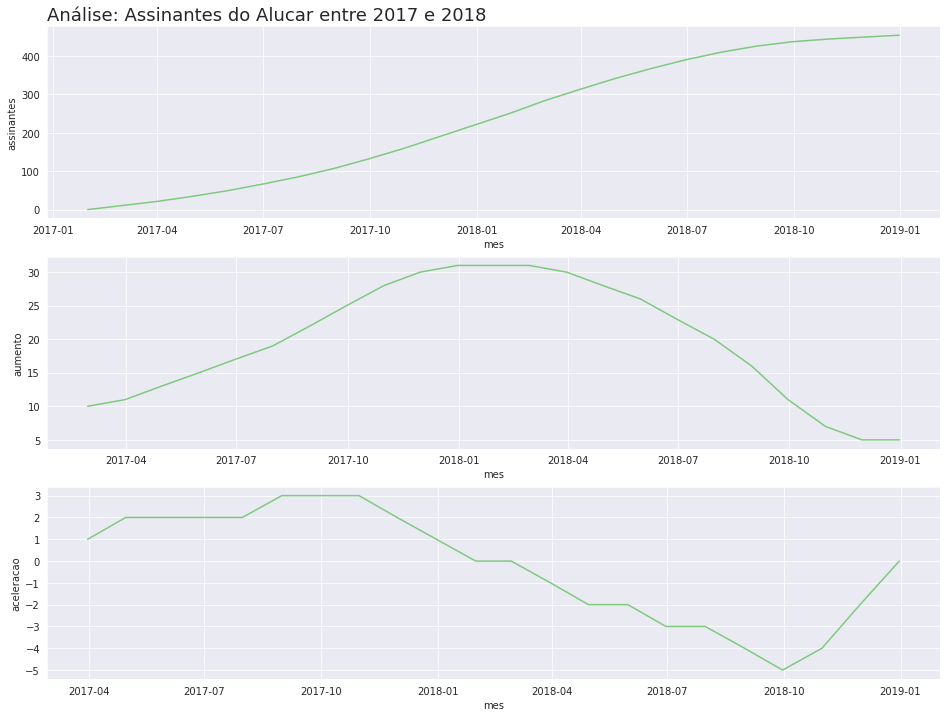

In [26]:
compararPlots('Análise: Assinantes do Alucar entre 2017 e 2018', 'mes', 'assinantes', 'aumento', 'aceleracao', assinantes)

# Chocolura - Análise de Vendas

In [27]:
url = 'https://raw.githubusercontent.com/strawndri/time-series/main/Data/chocolura.csv'
chocolura = pd.read_csv(url)
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


## Tratando os Dados

In [28]:
print(f'Quantidade de linhas e colunas: {chocolura.shape}')
print(f'Quantidade de dados nulos: {chocolura.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [29]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

# Comparando o valor das vendas

In [30]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

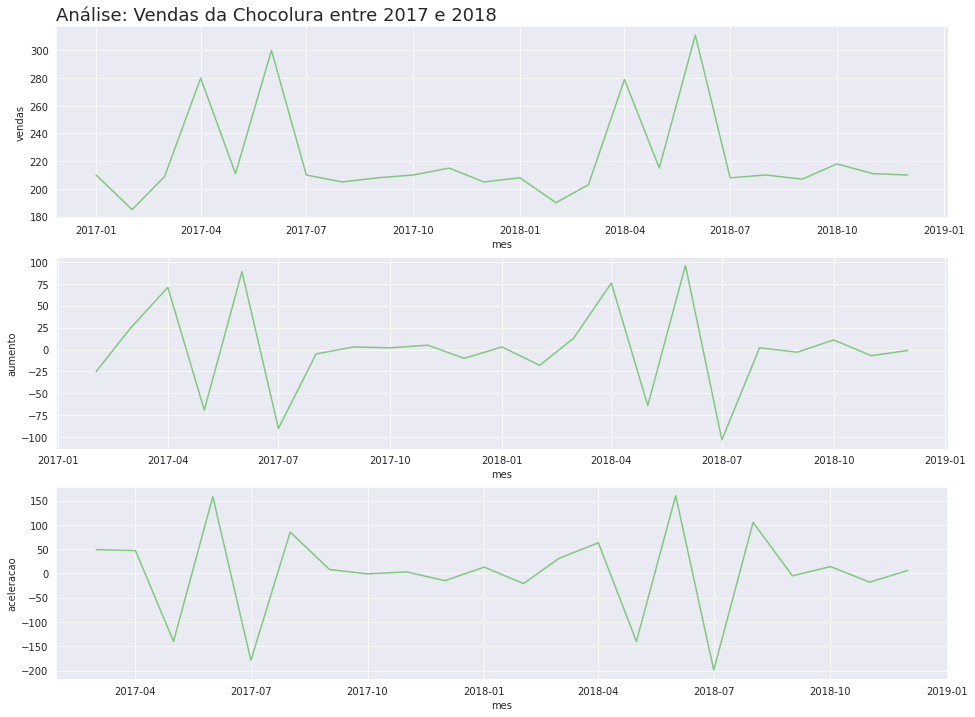

In [31]:
compararPlots('Análise: Vendas da Chocolura entre 2017 e 2018', 'mes', 'vendas', 'aumento', 'aceleracao', chocolura)

# Chocolura - Vendas por dia (entre Outubro e Novembro)

In [32]:
url = 'https://raw.githubusercontent.com/strawndri/time-series/main/Data/vendas_por_dia.csv'
chocolura_dias = pd.read_csv(url)
chocolura_dias.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


## Tratando os Dados

In [33]:
print(f'Quantidade de linhas e colunas: {chocolura_dias.shape}')
print(f'Quantidade de dados nulos: {chocolura_dias.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [34]:
chocolura_dias['dia'] = pd.to_datetime(chocolura_dias['dia'])
chocolura_dias.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

# Comparando valores

In [35]:
chocolura_dias['aumento'] = chocolura_dias['vendas'].diff()
chocolura_dias['aceleracao'] = chocolura_dias['aumento'].diff()

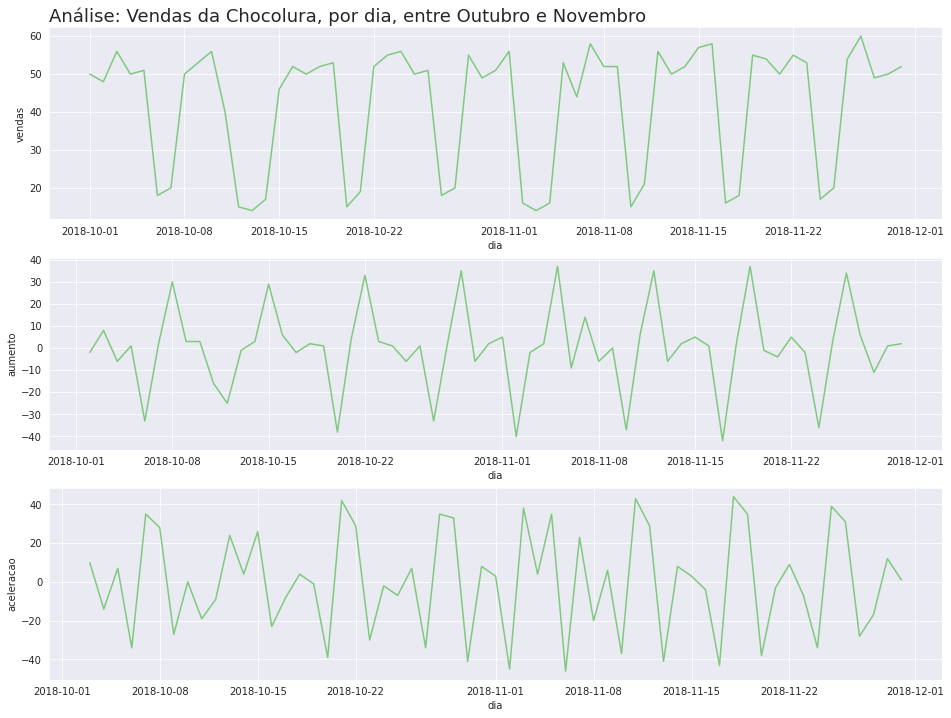

In [36]:
compararPlots('Análise: Vendas da Chocolura, por dia, entre Outubro e Novembro',
              'dia', 'vendas', 'aumento', 'aceleracao', chocolura_dias)

## Analisando a Sazonalidade

In [37]:
chocolura_dias['dia_da_semana'] = chocolura_dias['dia'].dt.day_name()
chocolura_dias.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


### Tradução 

In [38]:
chocolura_dias['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [39]:
dias_traduzidos = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta', 
    'Thursday': 'Quinta', 
    'Friday': 'Sexta', 
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

chocolura_dias['dia_da_semana'] = chocolura_dias['dia_da_semana'].map(dias_traduzidos)
chocolura_dias.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


## Média de Vendas por dia

In [40]:
vendas_agrupadas = chocolura_dias.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


## Conclusão

> Percebe-se que a taxa de vendas, o aumento e a aceleração diminuem conforme o final de semana se aproxima. Os dias com as menores médias são: Sábado e Domingo.
 

## Autocorrelação das vendas diárias da Chocolura

In [49]:
def autocorrelacao(title, dataframe, column, i=0):
  i = int(i)
  
  ax = plt.figure(figsize=(12, 6))
  ax.suptitle(title, fontsize=18)
  autocorrelation_plot(dataframe[column][i:])
  ax = ax

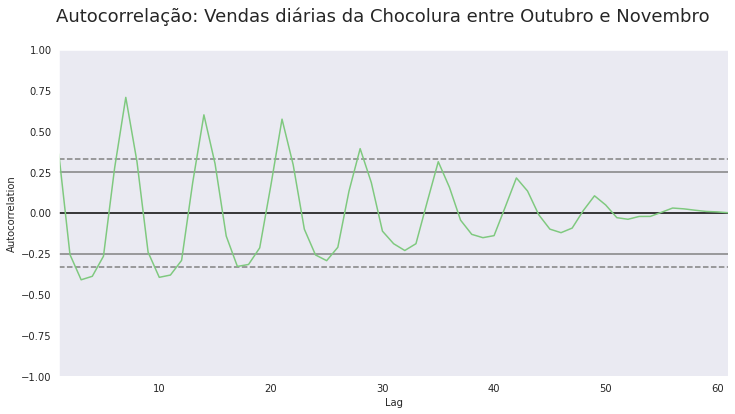

In [50]:
autocorrelacao('Autocorrelação: Vendas diárias da Chocolura entre Outubro e Novembro',
               chocolura_dias, 'vendas')

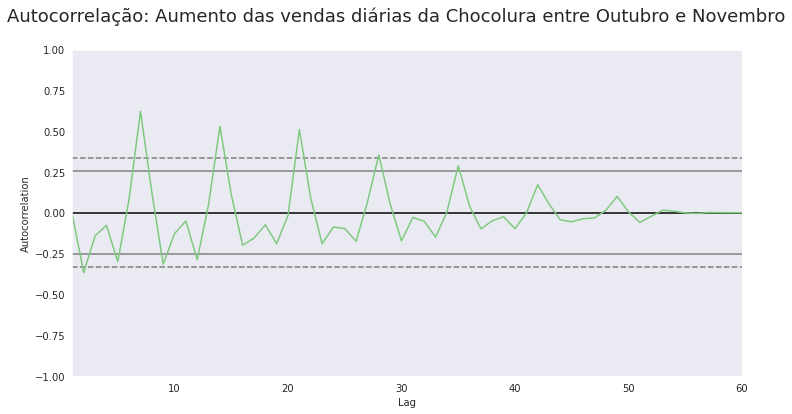

In [51]:
autocorrelacao('Autocorrelação: Aumento das vendas diárias da Chocolura entre Outubro e Novembro',
               chocolura_dias, 'aumento', 1)

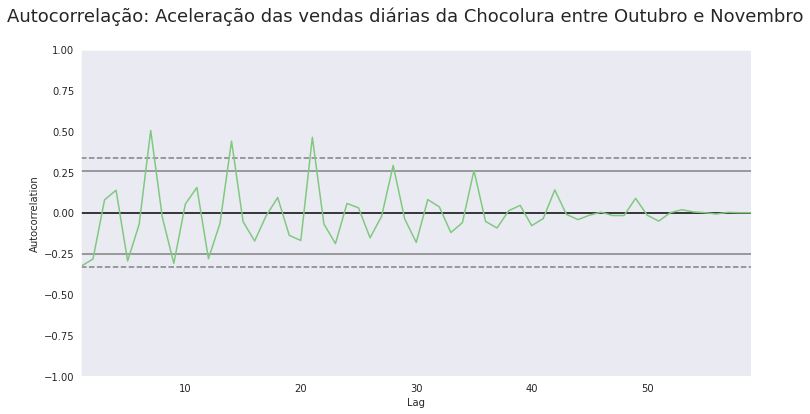

In [52]:
autocorrelacao('Autocorrelação: Aceleração das vendas diárias da Chocolura entre Outubro e Novembro',
               chocolura_dias, 'aceleracao', 2)